In [75]:
import pandas as pd
data = pd.read_csv('data/training_data_fall2024.csv')
"""Checking for missing values in data"""
print(f"numbers of missing data  \n{data.isnull().sum()}")
"""Nothing missed and there is no outliers"""

numbers of missing data  
hour_of_day       0
day_of_week       0
month             0
holiday           0
weekday           0
summertime        0
temp              0
dew               0
humidity          0
precip            0
snow              0
snowdepth         0
windspeed         0
cloudcover        0
visibility        0
increase_stock    0
dtype: int64


'Nothing missed and there is no outliers'

In [76]:
stats = data.drop(columns = ["increase_stock"]).describe()
print(stats)

       hour_of_day  day_of_week        month      holiday      weekday  \
count   1600.00000  1600.000000  1600.000000  1600.000000  1600.000000   
mean      11.37125     3.022500     6.468750     0.033125     0.710000   
std        6.94837     2.012965     3.454741     0.179019     0.453904   
min        0.00000     0.000000     1.000000     0.000000     0.000000   
25%        5.00000     1.000000     3.000000     0.000000     0.000000   
50%       12.00000     3.000000     6.000000     0.000000     1.000000   
75%       17.00000     5.000000     9.000000     0.000000     1.000000   
max       23.00000     6.000000    12.000000     1.000000     1.000000   

       summertime         temp          dew     humidity       precip    snow  \
count  1600.00000  1600.000000  1600.000000  1600.000000  1600.000000  1600.0   
mean      0.64375    15.210313     7.750750    63.927844     0.122042     0.0   
std       0.47904     9.264785    10.026459    19.079419     0.920600     0.0   
min      

In [77]:
"""When P > 0.05 we can say that the specific distribution of our data is a normal distribution"""
"""这里代码不需要修改，自己写也是这样的"""
from scipy.stats import shapiro, probplot, normaltest, kstest
from matplotlib import pyplot as plt

# A function
def normality_analysis(column_name):
    
    # Pearson test
    stat_dagostino, p_dagostino = normaltest(data[column_name])
    
    # Shapiro-Wilk test
    stat_shapiro, p_shapiro = shapiro(data[column_name])
    
    # Kolmogorov-Smirnov test
    stat_ks, p_ks = kstest(data[column_name], 'norm')
    
    # Saving results:
    results = pd.DataFrame({
        "Test": ["Shapiro-Wilk", "D'Agostino and Pearson", "Kolmogorov-Smirnov"],
        "Statistic": [stat_shapiro, stat_dagostino, stat_ks],
        "P-Value": [p_shapiro, p_dagostino, p_ks]
    })
    
    # Print the table in console
    print(f"Normality Test Results for {column_name}")
    print(results)

    # Plot histogram and Q-Q plot using matplotlib
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(data[column_name], bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    probplot(data[column_name], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {column_name}")

    plt.tight_layout()
    plt.show()

Normality Test Results for hour_of_day
                     Test    Statistic        P-Value
0            Shapiro-Wilk     0.952306   2.070926e-22
1  D'Agostino and Pearson  1043.475082  2.583835e-227
2      Kolmogorov-Smirnov     0.882875   0.000000e+00


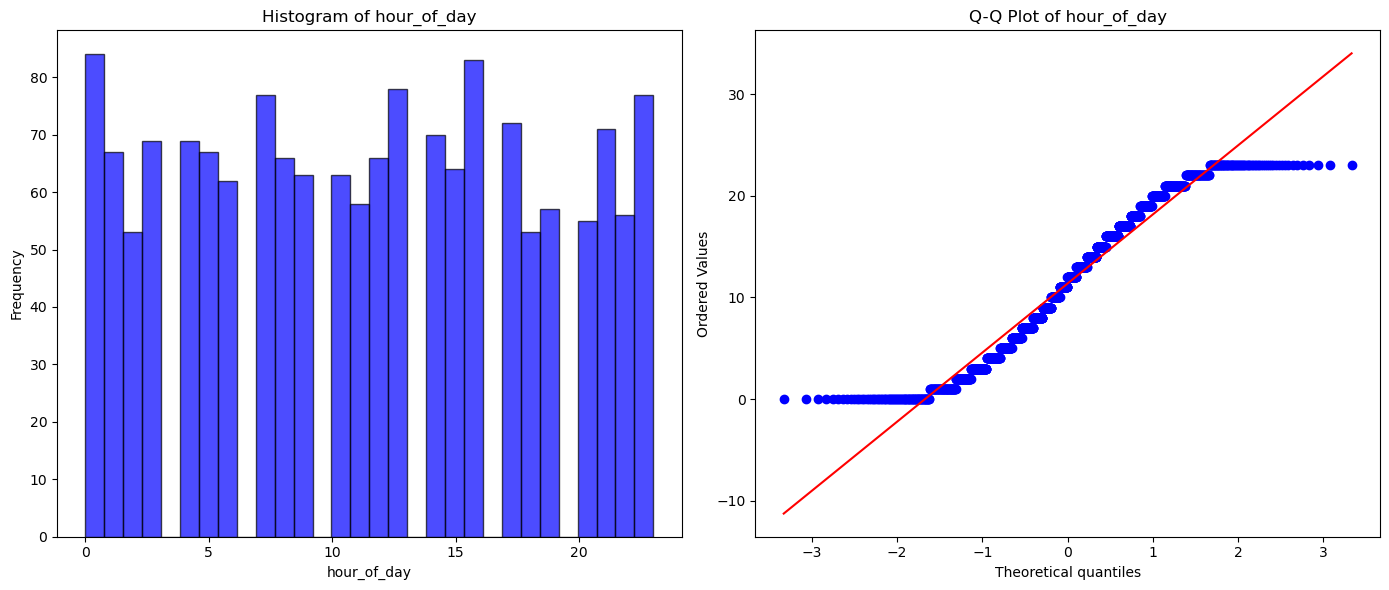

Normality Test Results for day_of_week
                     Test    Statistic       P-Value
0            Shapiro-Wilk     0.916144  6.931609e-29
1  D'Agostino and Pearson  2189.784622  0.000000e+00
2      Kolmogorov-Smirnov     0.695375  0.000000e+00


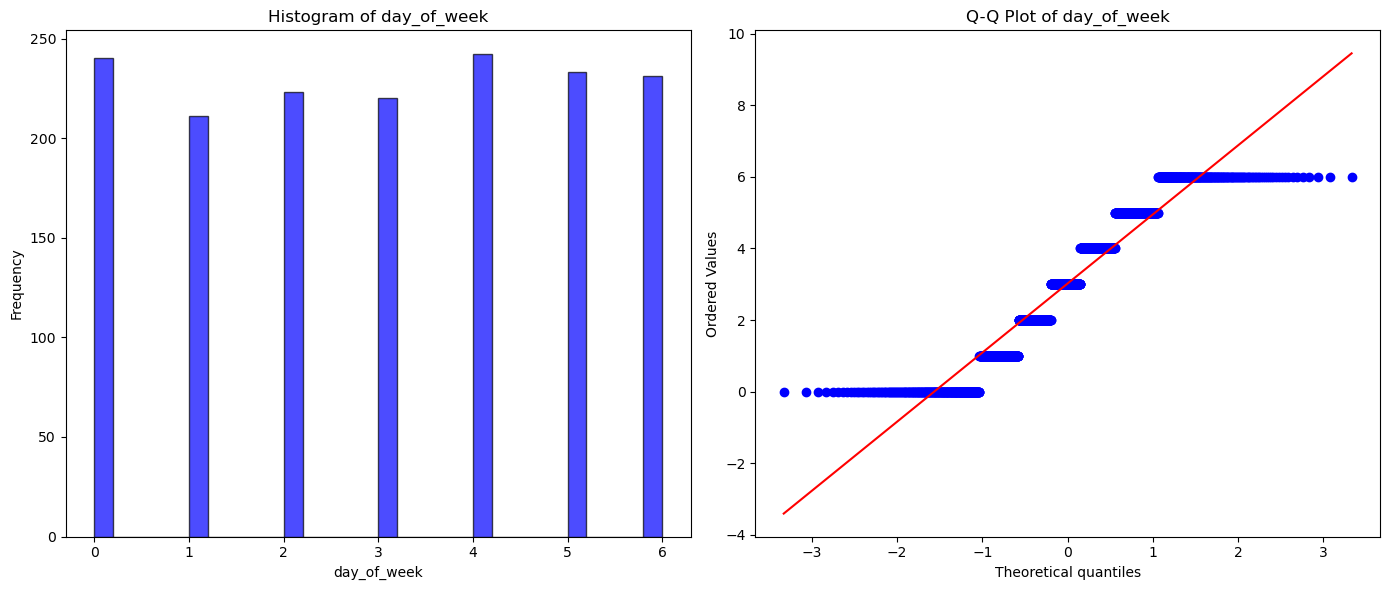

Normality Test Results for month
                     Test    Statistic       P-Value
0            Shapiro-Wilk     0.940101  6.406701e-25
1  D'Agostino and Pearson  1501.613167  0.000000e+00
2      Kolmogorov-Smirnov     0.897250  0.000000e+00


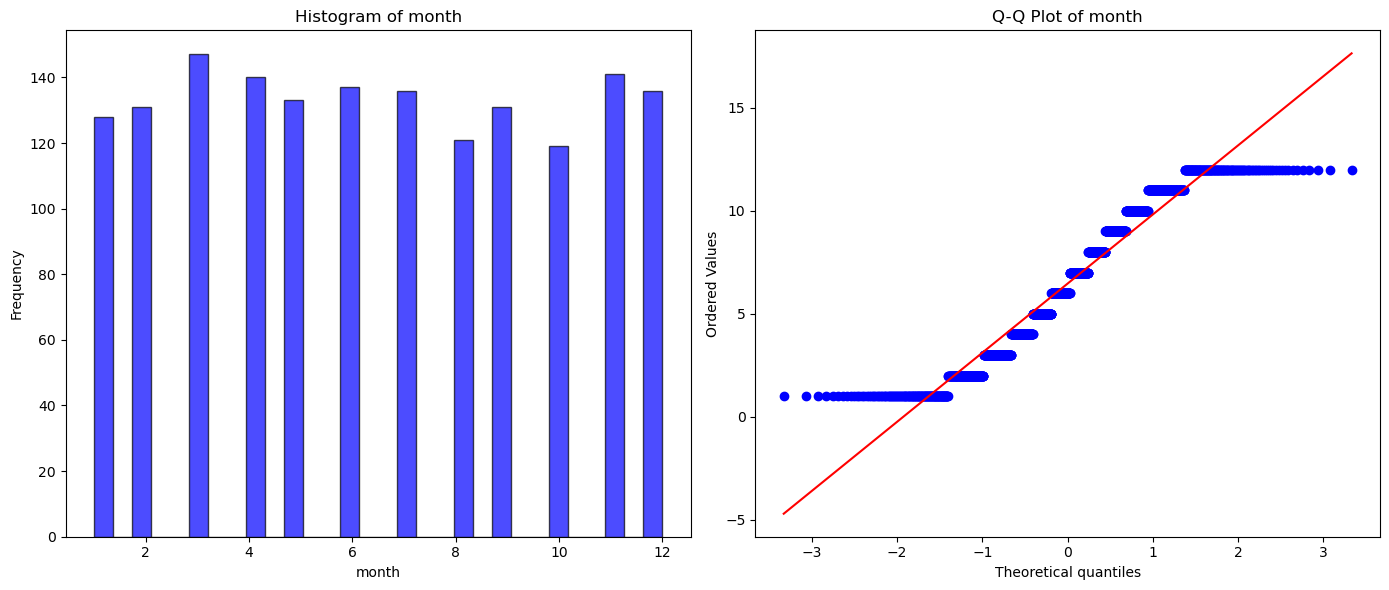

Normality Test Results for holiday
                     Test    Statistic       P-Value
0            Shapiro-Wilk     0.170219  3.540756e-64
1  D'Agostino and Pearson  1625.436744  0.000000e+00
2      Kolmogorov-Smirnov     0.500000  0.000000e+00


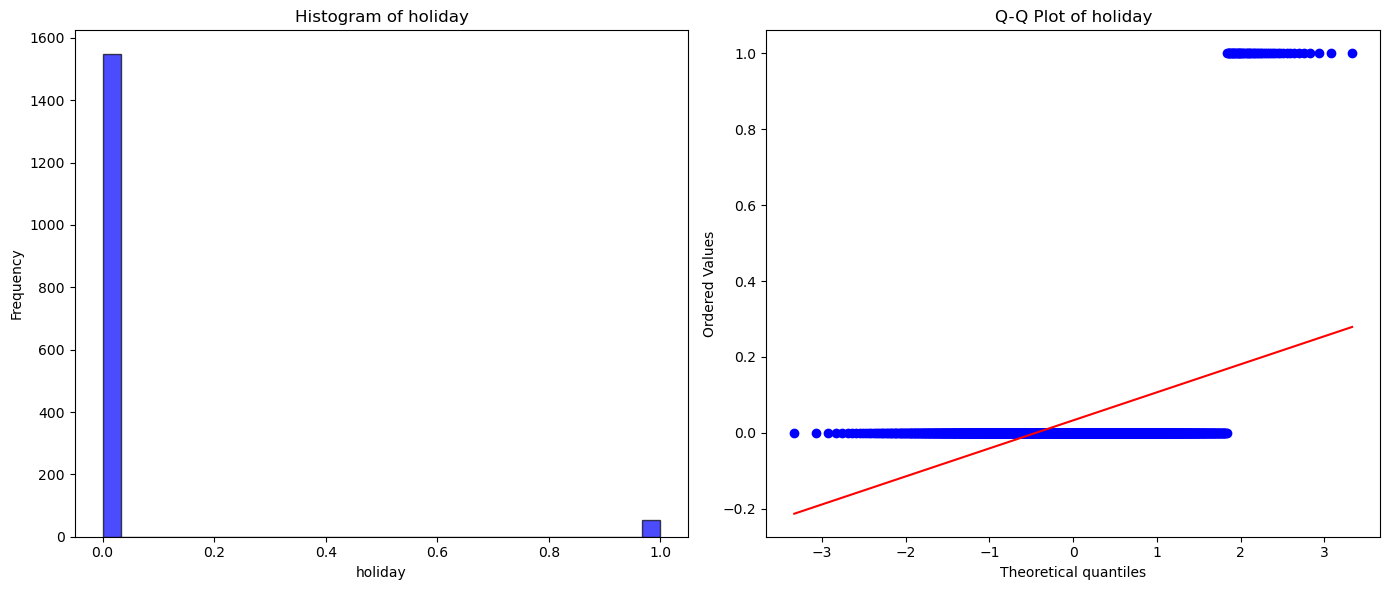

Normality Test Results for weekday
                     Test   Statistic        P-Value
0            Shapiro-Wilk    0.569038   1.292505e-52
1  D'Agostino and Pearson  987.721225  3.304161e-215
2      Kolmogorov-Smirnov    0.551345   0.000000e+00


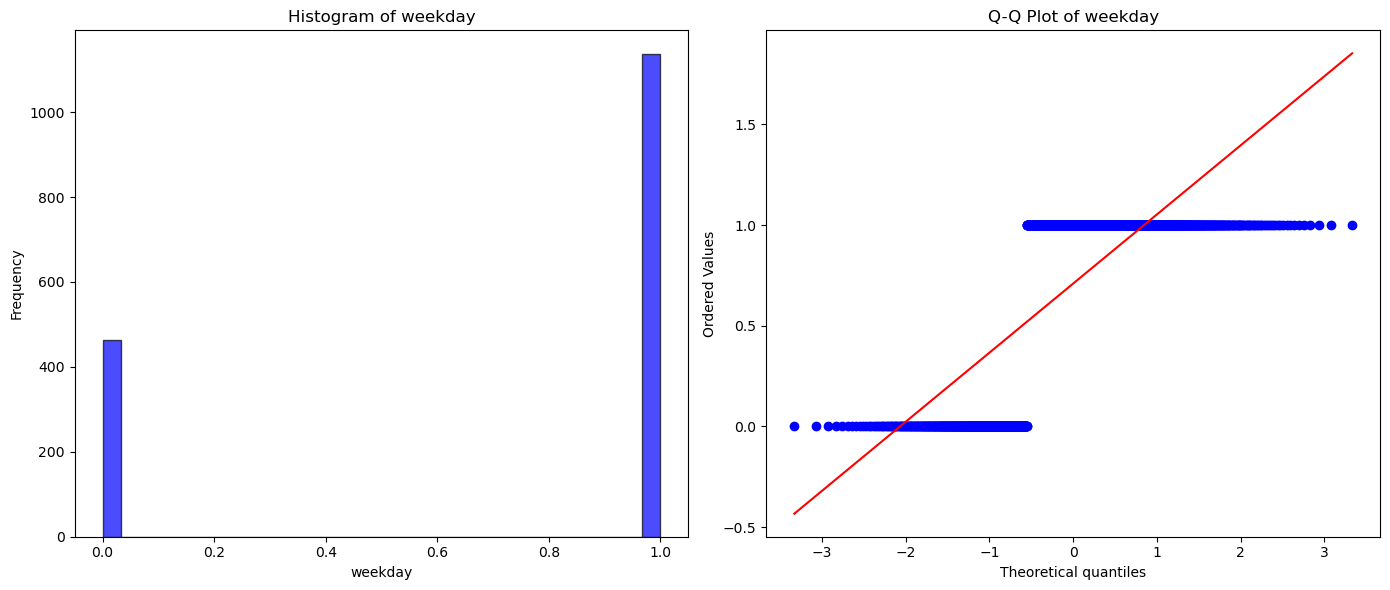

Normality Test Results for summertime
                     Test    Statistic       P-Value
0            Shapiro-Wilk     0.605840  3.938690e-51
1  D'Agostino and Pearson  8099.231977  0.000000e+00
2      Kolmogorov-Smirnov     0.500000  0.000000e+00


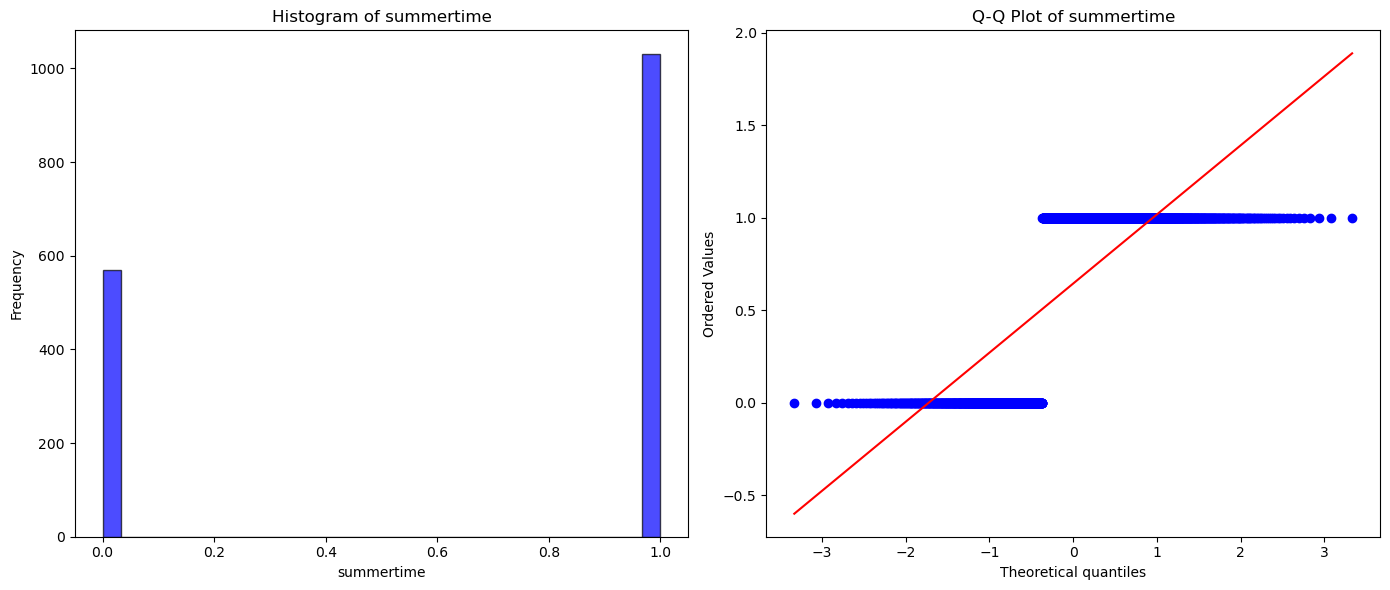

Normality Test Results for temp
                     Test   Statistic       P-Value
0            Shapiro-Wilk    0.977121  2.760607e-15
1  D'Agostino and Pearson  270.272027  2.047270e-59
2      Kolmogorov-Smirnov    0.904714  0.000000e+00


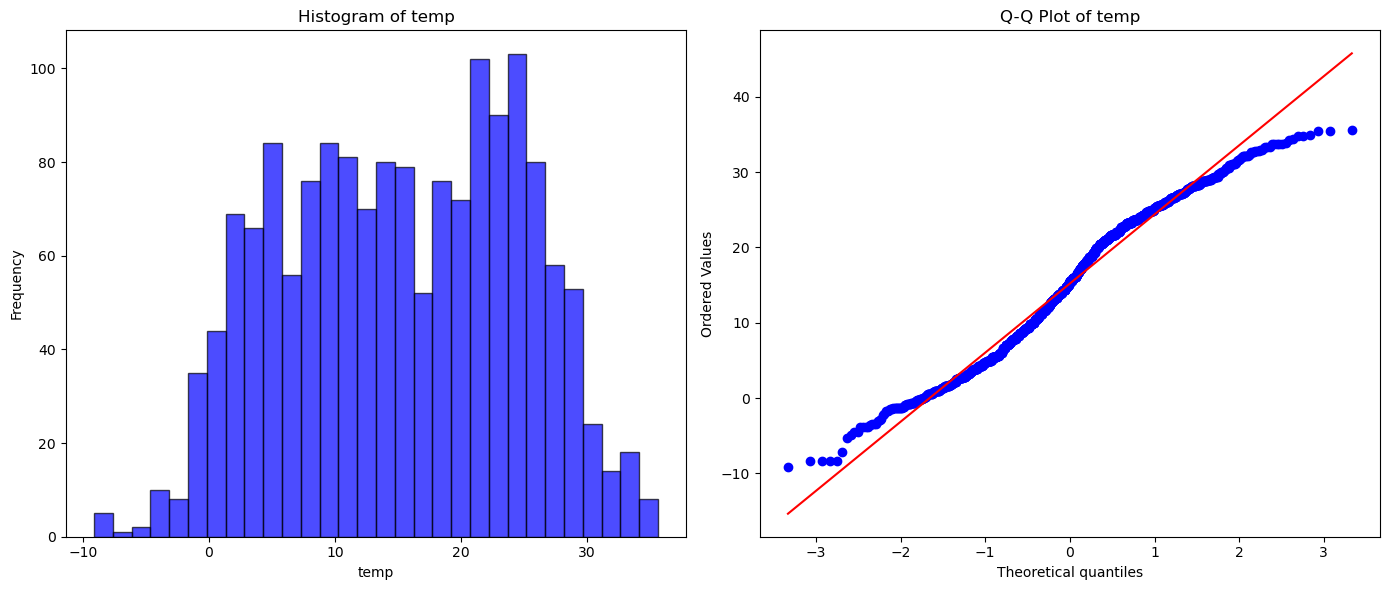

Normality Test Results for dew
                     Test   Statistic       P-Value
0            Shapiro-Wilk    0.960420  1.839337e-20
1  D'Agostino and Pearson  362.757180  1.691528e-79
2      Kolmogorov-Smirnov    0.656195  0.000000e+00


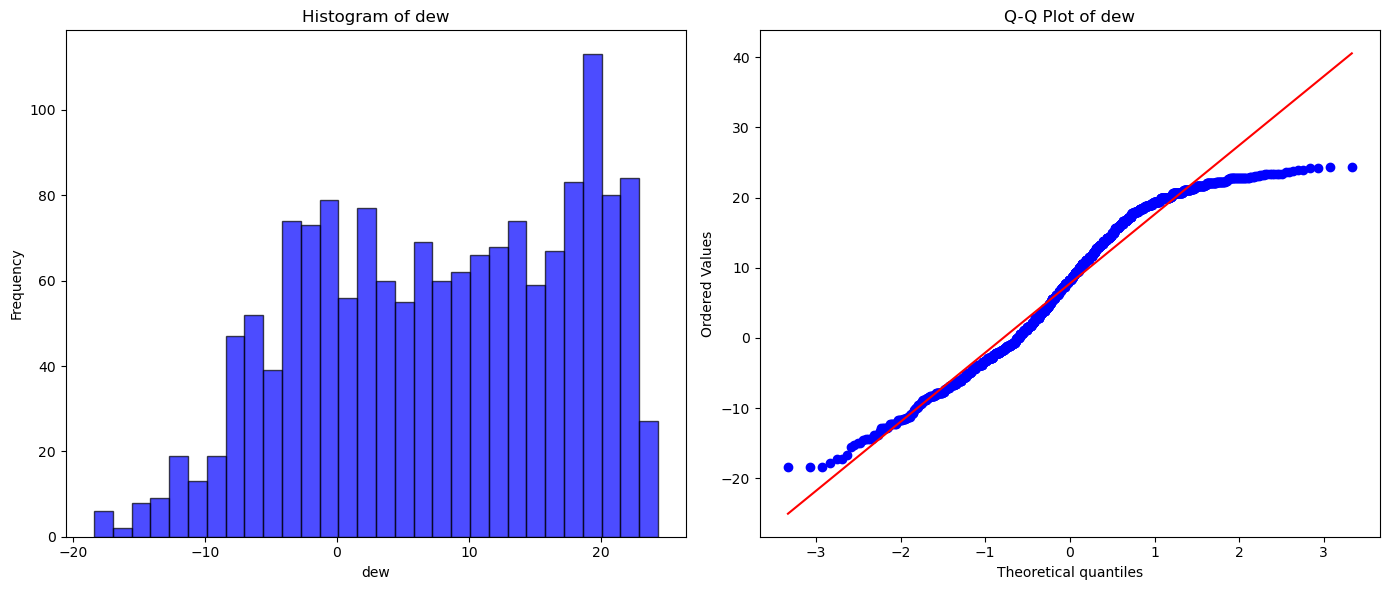

Normality Test Results for humidity
                     Test   Statistic       P-Value
0            Shapiro-Wilk    0.969090  5.023635e-18
1  D'Agostino and Pearson  298.439252  1.565813e-65
2      Kolmogorov-Smirnov    1.000000  0.000000e+00


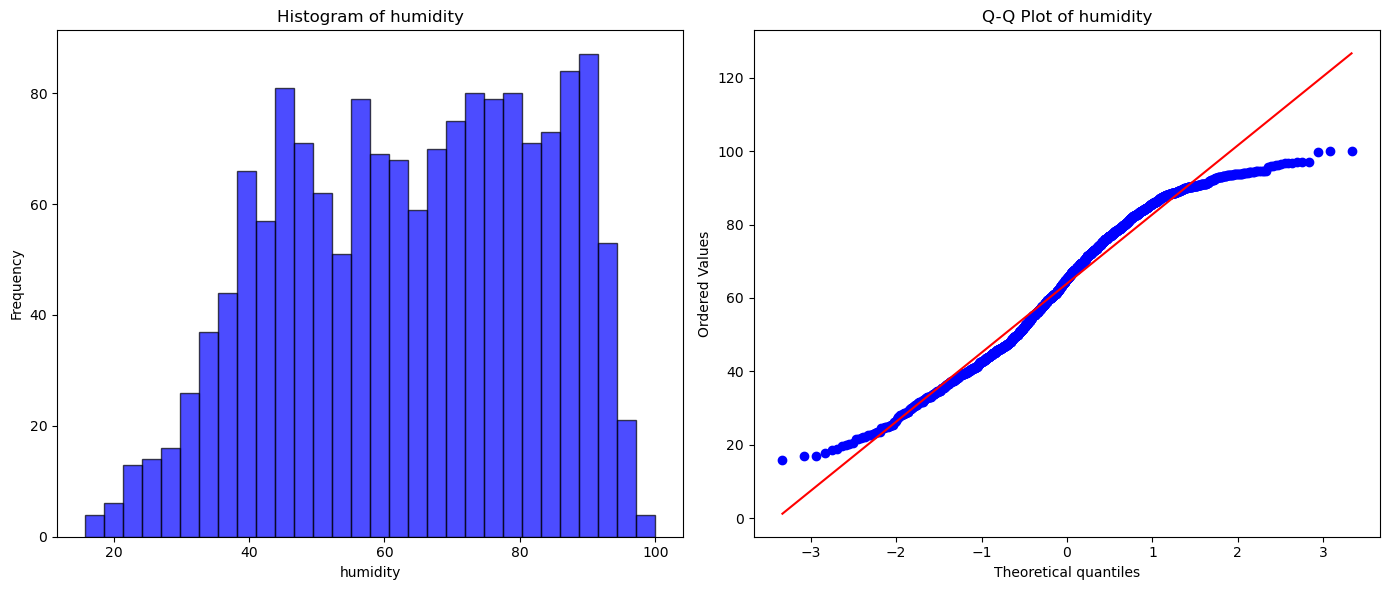

Normality Test Results for precip
                     Test    Statistic       P-Value
0            Shapiro-Wilk     0.111010  1.836421e-65
1  D'Agostino and Pearson  3350.807461  0.000000e+00
2      Kolmogorov-Smirnov     0.500000  0.000000e+00


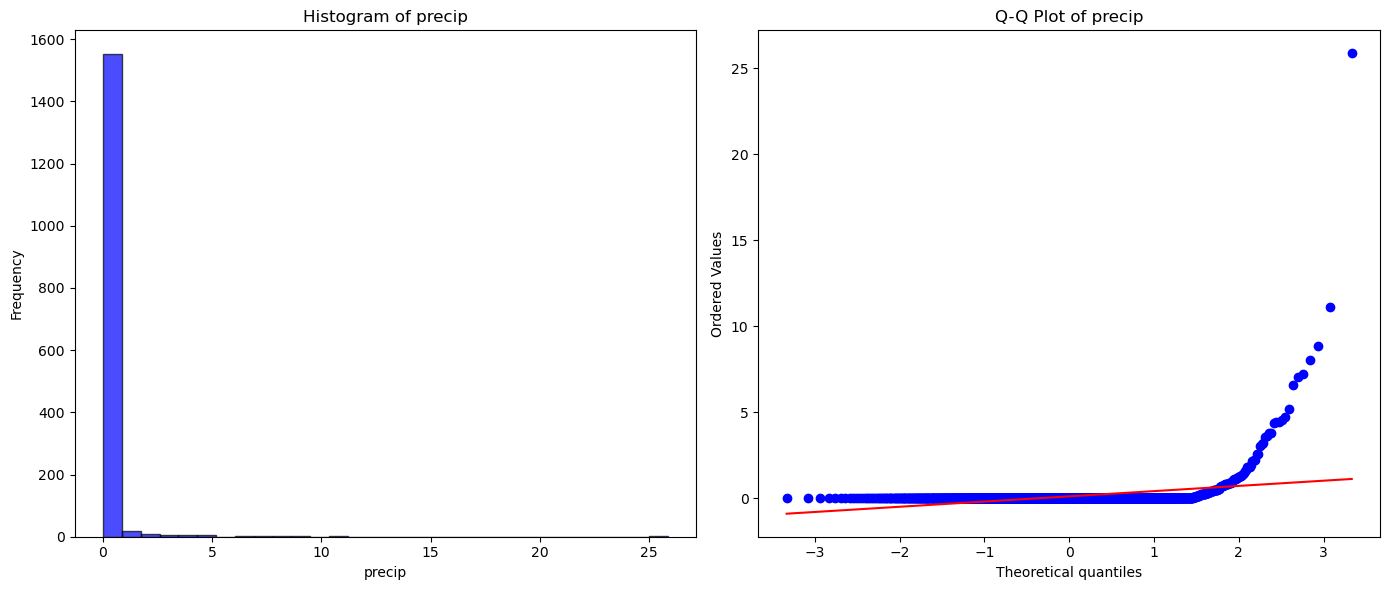

Normality Test Results for snow
                     Test  Statistic  P-Value
0            Shapiro-Wilk        1.0      1.0
1  D'Agostino and Pearson        NaN      NaN
2      Kolmogorov-Smirnov        0.5      0.0


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


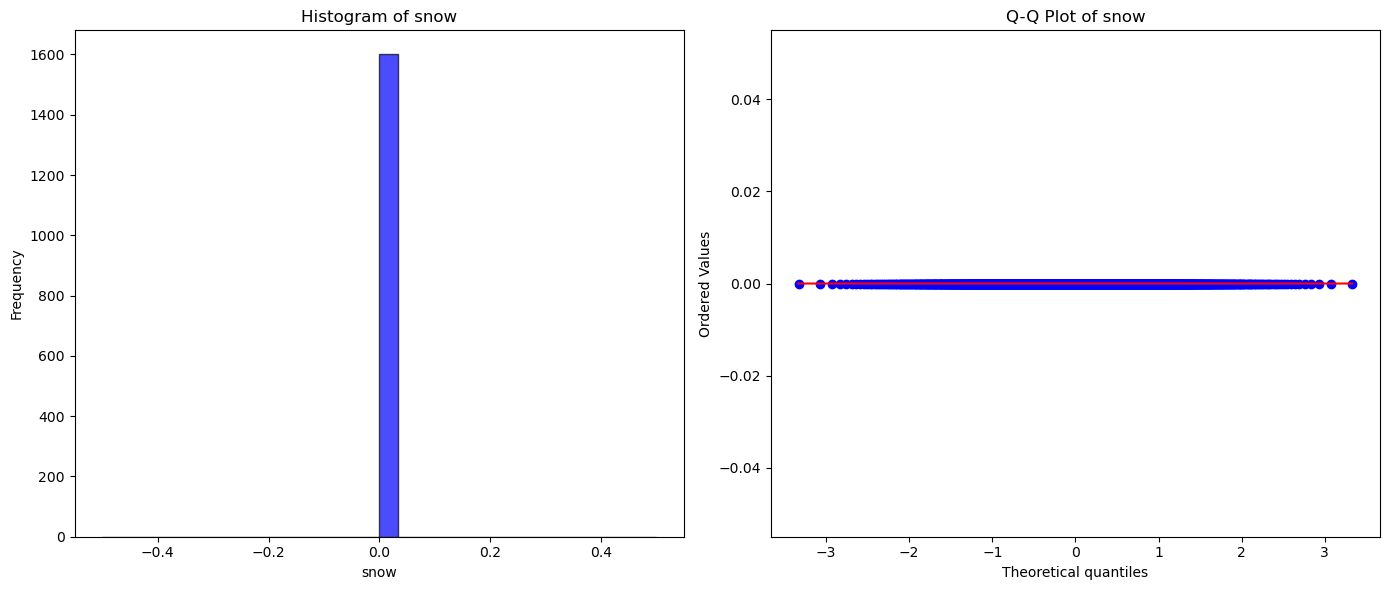

Normality Test Results for snowdepth
                     Test    Statistic       P-Value
0            Shapiro-Wilk     0.076529  3.538602e-66
1  D'Agostino and Pearson  2858.773092  0.000000e+00
2      Kolmogorov-Smirnov     0.500000  0.000000e+00


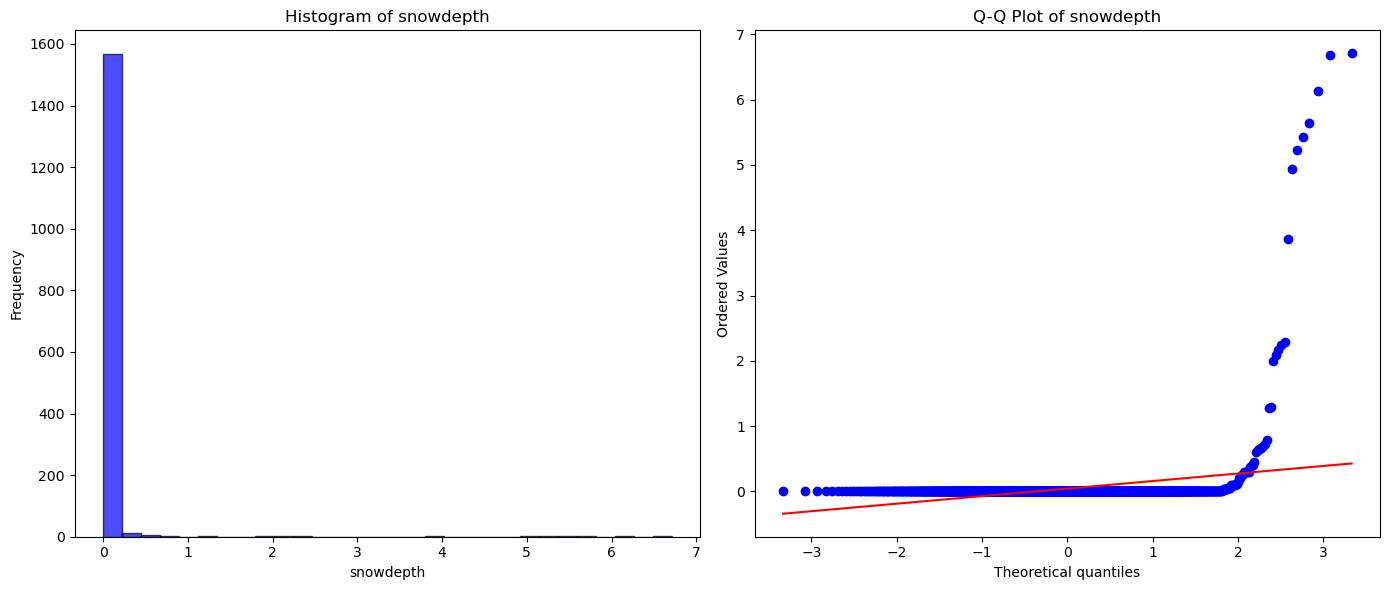

Normality Test Results for windspeed
                     Test   Statistic       P-Value
0            Shapiro-Wilk    0.967346  1.494994e-18
1  D'Agostino and Pearson  101.194680  1.061340e-22
2      Kolmogorov-Smirnov    0.917499  0.000000e+00


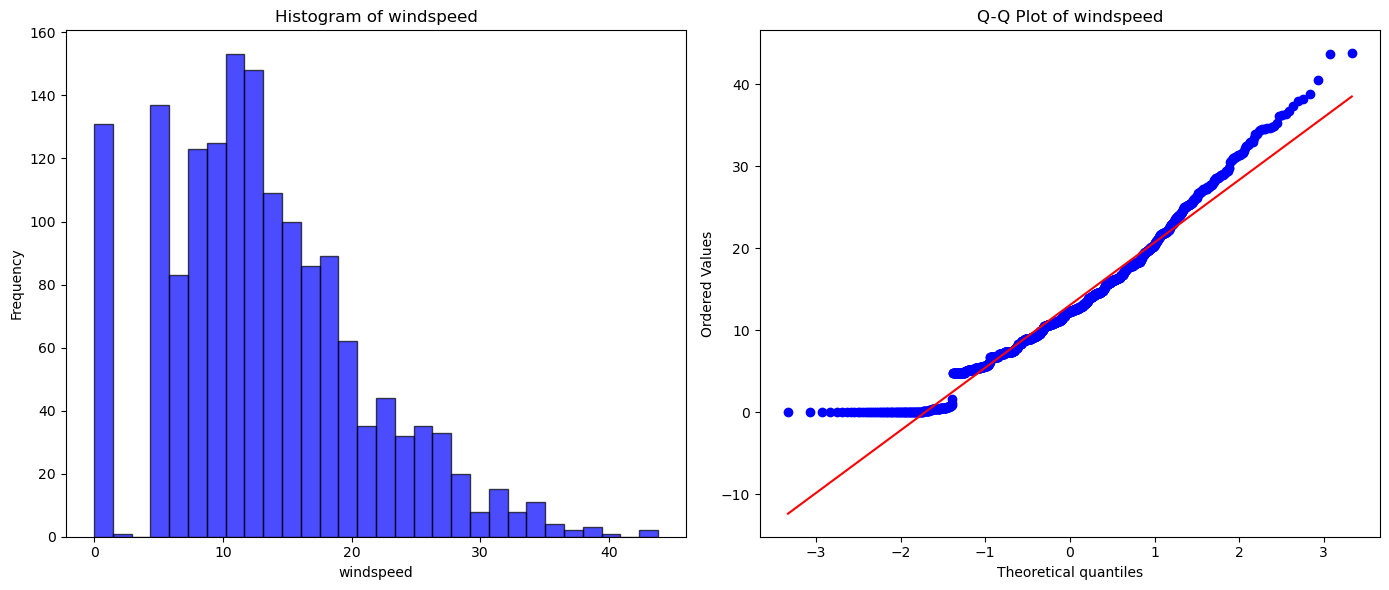

Normality Test Results for cloudcover
                     Test   Statistic        P-Value
0            Shapiro-Wilk    0.865706   5.866732e-35
1  D'Agostino and Pearson  667.260576  1.277047e-145
2      Kolmogorov-Smirnov    0.922500   0.000000e+00


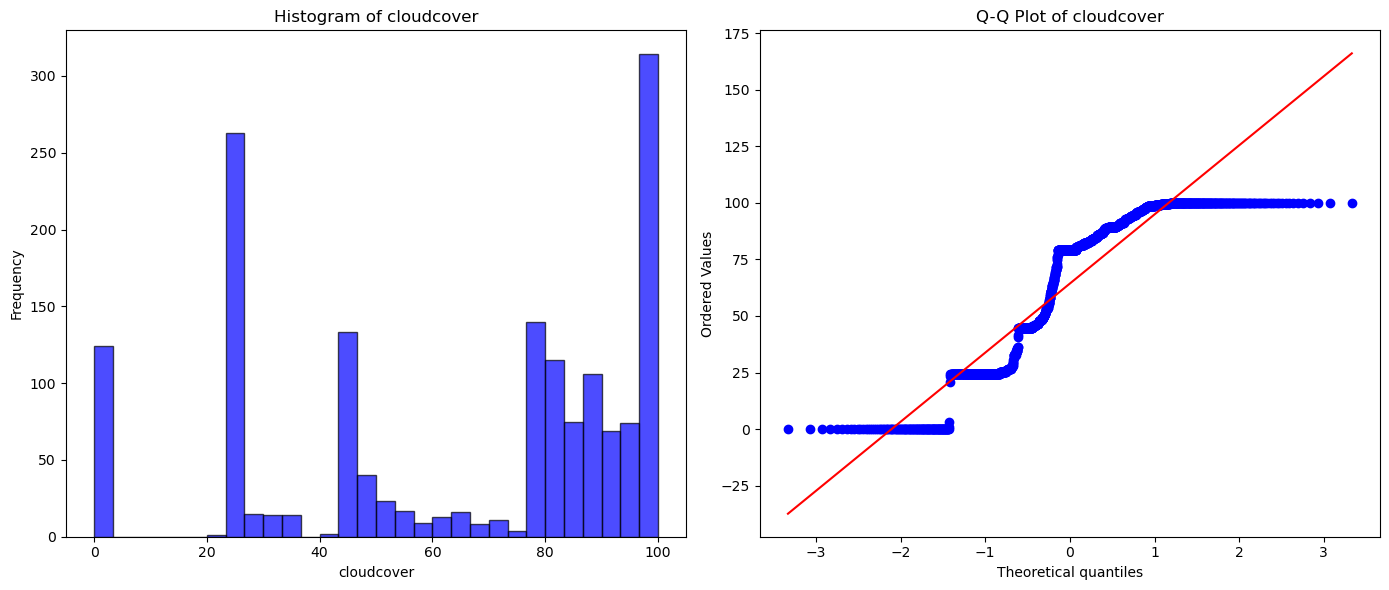

Normality Test Results for visibility
                     Test    Statistic        P-Value
0            Shapiro-Wilk     0.316106   1.214944e-60
1  D'Agostino and Pearson  1352.441155  2.094762e-294
2      Kolmogorov-Smirnov     0.992157   0.000000e+00


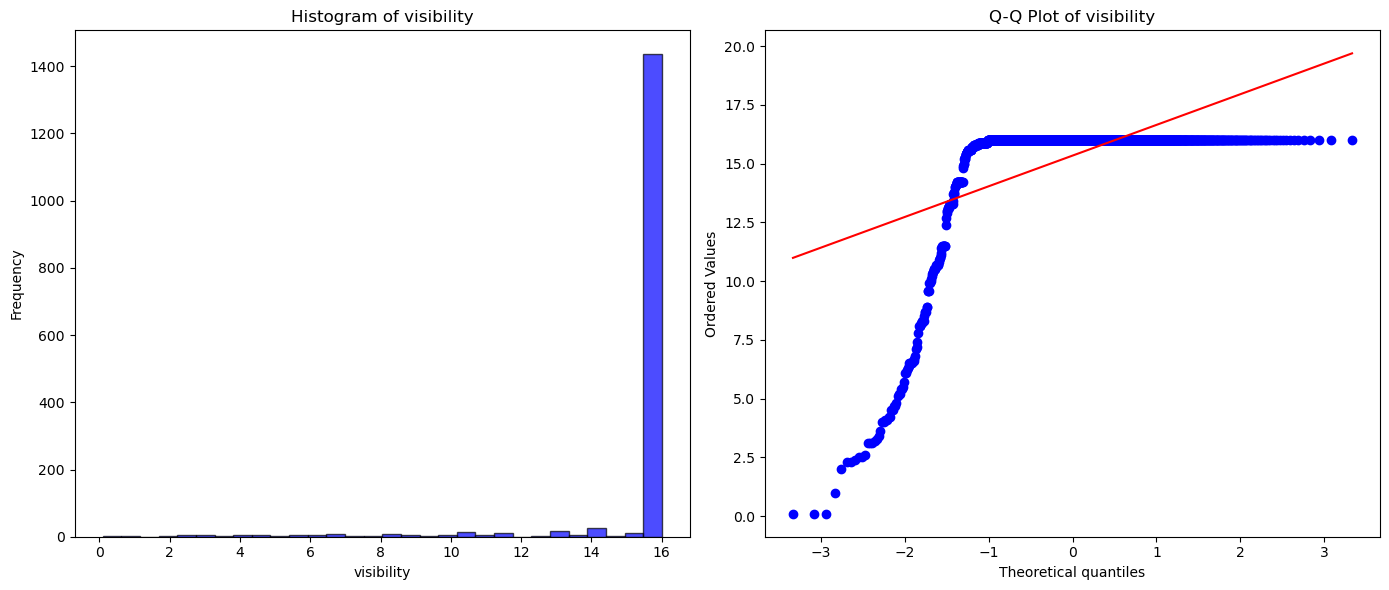

In [78]:
for column_name in stats.columns:
        normality_analysis(column_name)

C:\Users\BoyNextDoor\AppData\Local\Temp\ipykernel_8008\3218176628.py:11: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = spearmanr(data[col1], data[col2])


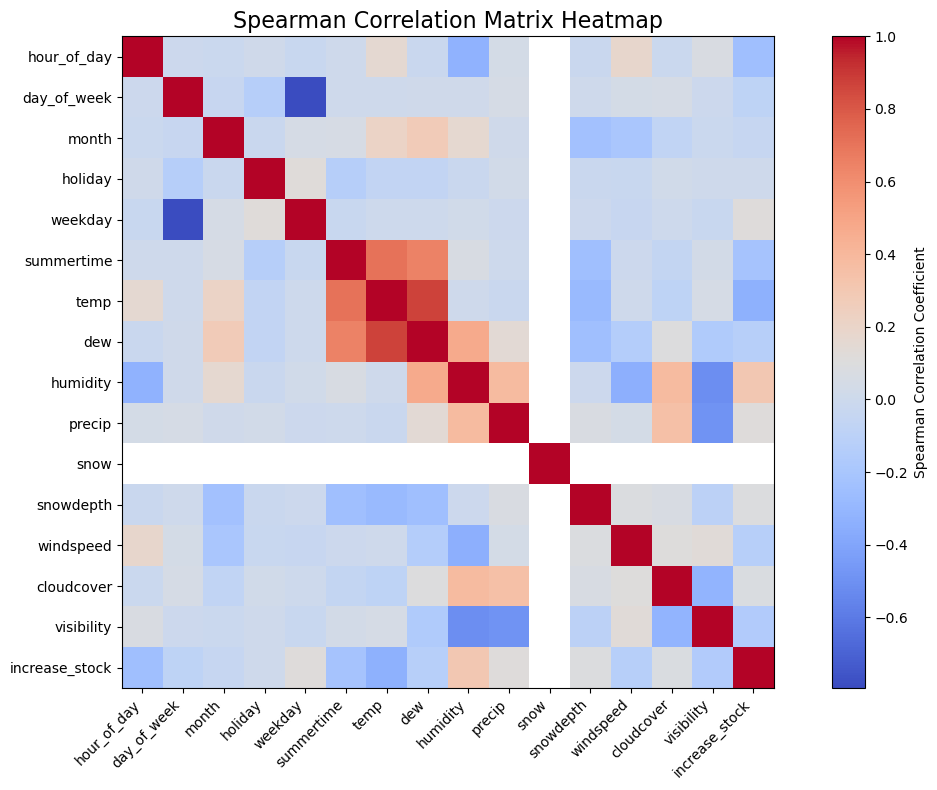

high_spearman_corr_df = 
     Feature 1 Feature 2  Correlation
0  day_of_week   weekday    -0.794134
1   summertime      temp     0.707876
2         temp       dew     0.873143


In [79]:
from scipy.stats import spearmanr
"""Calculate the P_values"""
def p_analysis(data):
    def p_test(data):
        columns = data.columns
        spearman_matrix = pd.DataFrame(index=columns, columns=columns)
        p_value_matrix = pd.DataFrame(index=columns, columns=columns)
        for col1 in columns:
            for col2 in columns:
                if col1 != col2:
                    corr, p_value = spearmanr(data[col1], data[col2])
                    spearman_matrix.loc[col1, col2] = corr
                    p_value_matrix.loc[col1, col2] = p_value
                else:
                    spearman_matrix.loc[col1, col2] = 1
                    p_value_matrix.loc[col1, col2] = 0  
        return spearman_matrix.astype(float), p_value_matrix.astype(float)
    spearman_correlation_matrix, spearman_p_value_matrix = p_test(data)
    plt.figure(figsize=(12, 8))
    plt.imshow(spearman_correlation_matrix, cmap='coolwarm', interpolation='none')
    plt.colorbar(label='Spearman Correlation Coefficient')
    plt.xticks(range(len(spearman_correlation_matrix.columns)), spearman_correlation_matrix.columns, rotation=45, ha='right')
    plt.yticks(range(len(spearman_correlation_matrix.columns)), spearman_correlation_matrix.columns)
    plt.title('Spearman Correlation Matrix Heatmap', fontsize=16)
    plt.tight_layout()
    plt.show()
    # Maybe we can consider that when threshold > 0.7 means two parameters are highly correlated
    threshold = 0.7
    high_spearman_corr_pairs = [
        (spearman_correlation_matrix.index[i], spearman_correlation_matrix.columns[j], spearman_correlation_matrix.iloc[i, j])
        for i in range(len(spearman_correlation_matrix.columns)) 
        for j in range(i + 1, len(spearman_correlation_matrix.columns)) 
        if abs(spearman_correlation_matrix.iloc[i, j]) > threshold and spearman_p_value_matrix.iloc[i, j] < 0.05
    ]
    
    high_spearman_corr_df = pd.DataFrame(high_spearman_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])
    print(f"high_spearman_corr_df = \n{high_spearman_corr_df}")
    
"""Call p_analysis function"""
"""热图可以看出来，snow数据全部为0，而有几个数据是高度相关的，可以选择去掉一些，降低数据维度来减少计算量，然而这是主管上的看法，做不做无所谓"""
p_analysis(data)

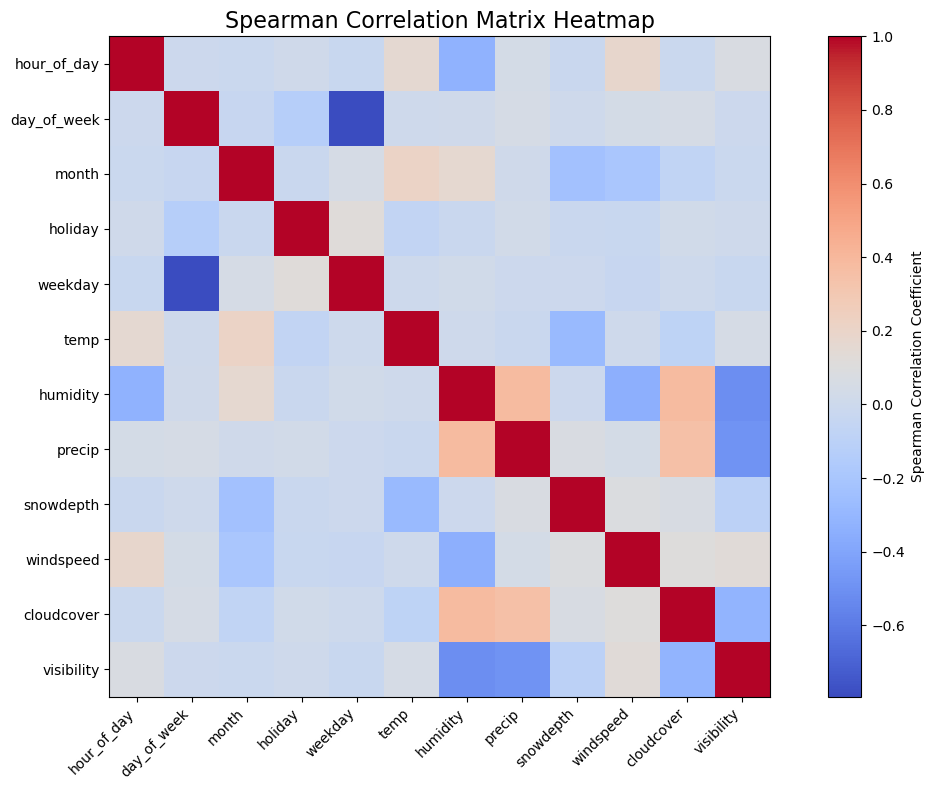

high_spearman_corr_df = 
     Feature 1 Feature 2  Correlation
0  day_of_week   weekday    -0.794134


,hour_of_day,day_of_week,month,holiday,weekday,temp,humidity,precip,snowdepth,windspeed,cloudcover,visibility
0,-0.917228,0.982689,-1.583465,-0.185094,-1.564697,-2.419627,-0.537283,-0.132609,-0.101439,0.414935,-0.999503,0.282338
1,1.386190,0.485754,-1.583465,-0.185094,0.639101,-1.782607,-1.203654,-0.132609,-0.101439,1.395045,0.652979,0.282338
2,1.386190,-0.011181,0.443370,-0.185094,0.639101,1.262128,0.496090,-0.132609,-0.101439,-1.687144,0.512472,0.282338
3,-1.493083,1.479624,-1.583465,-0.185094,-1.564697,-1.307542,-0.219564,-0.132609,-0.101439,0.788924,-1.964724,0.282338
4,0.810335,-1.501986,-1.004369,-0.185094,0.639101,-0.379006,-2.370721,-0.132609,-0.101439,-0.333044,-0.602419,0.282338
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,-1.205156,0.982689,-0.135726,-0.185094,-1.564697,0.679093,1.245299,-0.132609,-0.101439,-0.320148,-1.219427,0.282338
1596,0.378444,-1.501986,-0.135726,-0.185094,0.639101,0.862641,0.970047,2.276357,-0.101439,-0.423317,0.848466,-2.128327
1597,0.234481,-1.501986,-1.004369,-0.185094,0.639101,-0.141474,-1.625182,-0.132609,4.648411,0.659963,0.457491,0.282338
1598,0.378444,0.982689,-1.004369,-0.185094,-1.564697,-0.379006,-2.193511,-0.132609,-0.101439,-0.939165,-1.219427,0.282338


In [80]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
"""Drop the snow cause of all values are 0"""
numeric_data = numeric_data.drop(columns=['snow', 'summertime', 'dew'])
# use numeric_data defined above
from sklearn.preprocessing import StandardScaler
data_standardized = pd.DataFrame(StandardScaler().fit_transform(numeric_data), 
                                 columns=numeric_data.columns,
                                 index=numeric_data.index)
p_analysis(data_standardized) # Here nothing changed
data_standardized

In [81]:
scaler_standard = StandardScaler()
data_scaled = scaler_standard.fit_transform(numeric_data)
data_scaled

array([[-0.91722832,  0.98268907, -1.58346468, ...,  0.41493495,
        -0.99950338,  0.28233837],
       [ 1.38618987,  0.48575402, -1.58346468, ...,  1.39504548,
         0.65297853,  0.28233837],
       [ 1.38618987, -0.01118104,  0.44337011, ..., -1.68714421,
         0.51247175,  0.28233837],
       ...,
       [ 0.23448077, -1.5019862 , -1.00436902, ...,  0.65996258,
         0.45749084,  0.28233837],
       [ 0.37844441,  0.98268907, -1.00436902, ..., -0.93916512,
        -1.21942703,  0.28233837],
       [ 1.53015351,  1.47962412, -1.29391685, ...,  1.13712166,
         1.01035447,  0.28233837]])

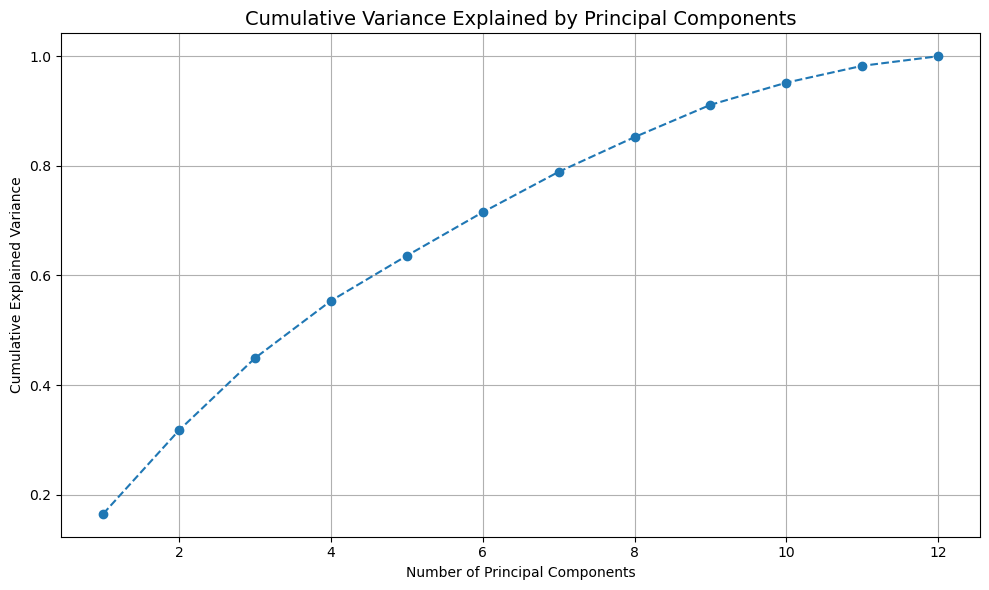

Number of components to retain at least 95% variance: 10


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.852354,1.820864,1.195832,-2.446411,-0.502304,1.172751,-0.877347,-0.267270,-0.272405,-0.050910
1,-1.149517,0.155063,2.671571,-0.204279,-0.214242,-0.337686,-0.867664,-0.982964,-1.016998,0.155540
2,0.199041,-0.538517,-1.330181,1.253170,0.182457,-0.778834,0.723019,-1.417490,0.472564,0.554451
3,-1.104760,2.064457,0.630151,-2.245124,-0.312736,1.534442,-0.841192,0.633912,0.698792,-0.668385
4,-1.705864,-1.613833,1.183030,0.018148,0.039014,0.751781,-0.378598,-1.188795,0.261950,0.436947
...,...,...,...,...,...,...,...,...,...,...
1595,0.048218,1.651680,-1.446288,-0.821070,0.069690,0.482043,0.036809,0.715809,1.147906,-0.503941
1596,2.891782,-0.936166,0.526439,1.935731,0.148962,0.645665,-0.435690,-0.499793,0.731456,0.043837
1597,-0.414637,-1.359487,3.270440,-0.904589,1.976157,-0.434953,2.697714,0.439915,1.031411,1.300036
1598,-2.076066,1.474633,0.257942,-0.563515,-0.549642,1.306524,0.091414,-1.080445,0.689873,0.499300


In [82]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca_components = pca.fit_transform(data_scaled)

# Create a DataFrame for PCA results to calculate how many components we need to keep
pca_df = pd.DataFrame(
    data=pca_components,
    index=numeric_data.index,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative variance explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Variance Explained by Principal Components", fontsize=14)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.tight_layout()
plt.show()

"""select the components that can keep at least 95% information"""
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain at least 95% variance: {n_components}")
selected_pcs = pca_df.iloc[:, :n_components]
"""Remember to convert it into a numpy array"""
selected_pcs

In [84]:
"""进行测试训练"""
from sklearn.model_selection import train_test_split

X = selected_pcs.to_numpy()
mapping = {'high_bike_demand': 1, 'low_bike_demand': 0}
y = data['increase_stock'].replace(mapping).to_numpy().reshape(-1, 1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def sigmoid(z):
    #裁剪,避免溢出错误
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

def computeLoss(y, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10) 
    m = len(y)
    return - (1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def computeGradient(X, y, y_pred):
    m = len(y)
    return (1 / m) * np.dot(X.T, (y_pred - y))  

def gradientDescent(X, y, learning_rate=0.01, num_iterations=1000):
    # 初始化参数
    n = X.shape[1]
    theta = np.zeros((n, 1))  
    b = 0 

    for i in range(num_iterations):
        #计算预测值
        z = np.dot(X, theta) + b
        y_pred = sigmoid(z)

        #计算损失
        loss = computeLoss(y, y_pred)

        #计算梯度
        gradient_theta = computeGradient(X, y, y_pred)
        gradient_b = np.mean(y_pred - y)

        #更新参数
        theta -= learning_rate * gradient_theta
        b -= learning_rate * gradient_b
    
    return theta, b
def predict(X, theta, b, threshold=0.5):
    X = X.reshape(-1, X.shape[1]) 
    z = np.dot(X, theta) + b
    y_pred = sigmoid(z)
    return (y_pred >= threshold).astype(int)

#训练
theta, b = gradientDescent(X_train, y_train, learning_rate=0.01, num_iterations=2000)

#测试
y_pred = predict(X_test, theta, b)


# 模型评估
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# 计算标签0和标签1的分别预测准确度
# 将 y_test 和 y_pred 转换为一维数组
y_test_flat = y_test.reshape(-1)
y_pred_flat = y_pred.reshape(-1)

# 标签0的准确度
indices_class0 = np.where(y_test_flat == 0)[0]
total_class0 = len(indices_class0)
correct_class0 = np.sum(y_pred_flat[indices_class0] == y_test_flat[indices_class0])
accuracy_class0 = correct_class0 / total_class0
print(f"Accuracy for label 0 (low_bike_demand): {accuracy_class0:.2f}")

# 标签1的准确度
indices_class1 = np.where(y_test_flat == 1)[0]
total_class1 = len(indices_class1)
correct_class1 = np.sum(y_pred_flat[indices_class1] == y_test_flat[indices_class1])
accuracy_class1 = correct_class1 / total_class1
print(f"Accuracy for label 1 (high_bike_demand): {accuracy_class1:.2f}")

Test Accuracy: 0.82
Accuracy for label 0 (low_bike_demand): 0.91
Accuracy for label 1 (high_bike_demand): 0.28


C:\Users\BoyNextDoor\AppData\Local\Temp\ipykernel_8008\4058834478.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = data['increase_stock'].replace(mapping).to_numpy().reshape(-1, 1)
